### 문제점 시각화

#### 탄소 배출량 그래프 

In [1]:
import pandas as pd

In [2]:
carbon = pd.read_csv("./탄소배출.csv")

In [3]:
list = ['sgg_cd', 'total']
carbon = carbon[list]

In [4]:
carbon

,sgg_cd,total
0,42110,1737530.12
1,42130,2331239.59
2,42150,1650249.33
3,42170,687012.38
4,42190,306891.40
...,...,...
245,43745,400808.73
246,43750,2030571.56
247,43760,600175.97
248,43770,2371445.80


In [5]:
import os

# 주어진 경로에 있는 행정 경계 단위를 하나의 데이터 프레임으로 만들기 위한 과정
base_dir = "C:/Users/USER/Desktop/불당동/탄소 배출량/탄소배출_건물_전기_행정경계" 

df_list = []

folders = [f.path for f in os.scandir(base_dir) if f.is_dir()]

for folder in folders:
    folder_name = os.path.basename(folder)

    csv_path = os.path.join(folder, f"{folder_name}.csv")
    
    if os.path.exists(csv_path):
        try:
            df = pd.read_csv(csv_path, encoding='euc-kr')
            df_list.append(df)
        except UnicodeDecodeError:
            print(f"파일을 읽을 수 없습니다: {csv_path}")

final_df = pd.concat(df_list, ignore_index=True)

In [6]:
final_df

,sd_cd,sd_nm,sgg_cd,sgg_nm,e_01,e_02,e_03,e_04,e_05,e_06,e_07,e_08,e_09,e_10,e_11,e_12,e_tot
0,42,강원도,42110,춘천시,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23,675973.23
1,42,강원도,42130,원주시,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88,1000186.88
2,42,강원도,42150,강릉시,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02,761282.02
3,42,강원도,42170,동해시,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00,346146.00
4,42,강원도,42190,태백시,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52,111280.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43,충청북도,43745,증평군,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84,244105.84
246,43,충청북도,43750,진천군,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23,1183519.23
247,43,충청북도,43760,괴산군,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94,200495.94
248,43,충청북도,43770,음성군,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30,1394653.30


In [7]:
list = ['sgg_cd', 'sgg_nm']
final_df = final_df[list]

In [8]:
final_df

,sgg_cd,sgg_nm
0,42110,춘천시
1,42130,원주시
2,42150,강릉시
3,42170,동해시
4,42190,태백시
...,...,...
245,43745,증평군
246,43750,진천군
247,43760,괴산군
248,43770,음성군


In [9]:
# 지역명과 탄소 배출량을 하나의 데이터 프레임으로 병합
total_carbon = pd.merge(final_df, carbon, how='inner', on='sgg_cd')

In [10]:
total_carbon

,sgg_cd,sgg_nm,total
0,42110,춘천시,1737530.12
1,42130,원주시,2331239.59
2,42150,강릉시,1650249.33
3,42170,동해시,687012.38
4,42190,태백시,306891.40
...,...,...,...
245,43745,증평군,400808.73
246,43750,진천군,2030571.56
247,43760,괴산군,600175.97
248,43770,음성군,2371445.80


In [11]:
# total 값을 기준으로 내림차순 정렬 (큰 값이 위로 오도록 정렬)
sorted_df = total_carbon.sort_values(by='total', ascending=False).reset_index(drop=True)

# 천안이 포함된 행들의 위치를 출력
cheonan_rows = sorted_df[sorted_df['sgg_nm'].str.contains('천안')]
for i, row in cheonan_rows.iterrows():
    print(f"천안이 포함된 행: {row['sgg_nm']}는 {i+1}번째에 위치합니다.")

천안이 포함된 행: 천안시 서북구는 17번째에 위치합니다.
천안이 포함된 행: 천안시 동남구는 45번째에 위치합니다.


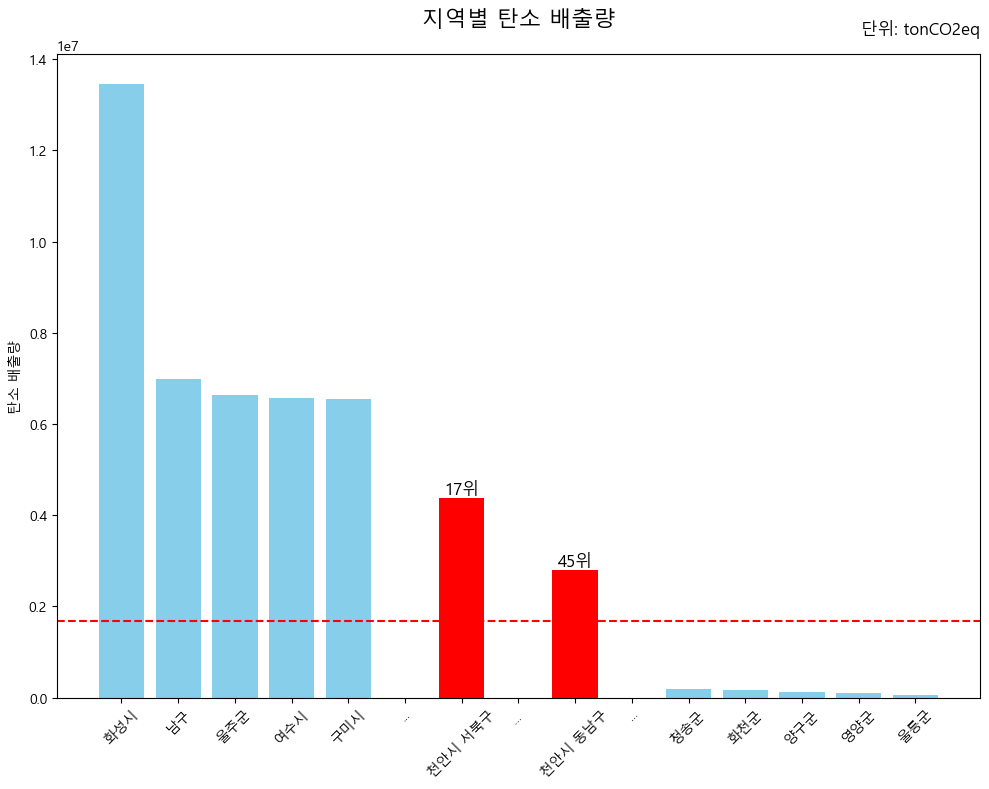

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mean_total = total_carbon['total'].mean()

# total 값을 기준으로 내림차순 정렬 (큰 값이 오른쪽에 오도록 정렬)
sorted_df = total_carbon.sort_values(by='total', ascending=False).reset_index(drop=True)

cheonan = sorted_df[sorted_df['sgg_nm'].str.contains('천안')].copy()  # .copy()를 추가하여 경고를 방지
cheonan.loc[:, 'rank'] = cheonan.index + 1  # 순위는 인덱스 + 1

top_5 = sorted_df.iloc[:5]
bottom_5 = sorted_df.iloc[-5:]

ellipsis_1 = pd.DataFrame({'sgg_nm': ['...'], 'total': [0]})
ellipsis_2 = pd.DataFrame({'sgg_nm': ['... '], 'total': [0]})
ellipsis_3 = pd.DataFrame({'sgg_nm': [' ...'], 'total': [0]})

cheonan_dongnam = cheonan[cheonan['sgg_nm'].str.contains('동남구')].copy()
cheonan_seobuk = cheonan[cheonan['sgg_nm'].str.contains('서북구')].copy()

final_df = pd.concat([top_5, ellipsis_1, cheonan_seobuk, ellipsis_2, cheonan_dongnam, ellipsis_3, bottom_5], ignore_index=True)

# 색상 지정: 천안시 포함 행은 빨간색, 나머지는 파란색
colors = ['red' if '천안' in sgg_nm else 'skyblue' for sgg_nm in final_df['sgg_nm']]

plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.figure(figsize=(10, 8))
bars = plt.bar(final_df['sgg_nm'], final_df['total'], color=colors)

# 천안 데이터 강조 및 순위 표시
for bar, label in zip(bars, final_df['sgg_nm']):
    if '천안' in label:
        rank = cheonan[cheonan['sgg_nm'] == label]['rank'].values[0]
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{int(rank)}위', ha='center', va='bottom', fontsize=12, color='black')

plt.axhline(y=mean_total, color='red', linestyle='--', label=f'전국 평균 탄소 배출량')

plt.ylabel('탄소 배출량')
plt.xticks(rotation=45)
plt.title('지역별 탄소 배출량', fontsize=16, pad=20) 
plt.text(x=1, y=1.025, s='단위: tonCO2eq', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()

In [13]:
mean_total

1685323.15876

In [14]:
# final_df 데이터프레임에서 지역명과 탄소 배출량 값을 출력
print(final_df[['sgg_nm', 'total']])

     sgg_nm        total
0       화성시  13444966.64
1        남구   6992502.76
2       울주군   6640020.86
3       여수시   6574965.14
4       구미시   6535609.07
5       ...         0.00
6   천안시 서북구   4367678.43
7      ...          0.00
8   천안시 동남구   2794846.70
9       ...         0.00
10      청송군    179615.10
11      화천군    166535.36
12      양구군    130851.43
13      영양군     99119.98
14      울릉군     44757.58


### PCA

#### 사회적 특성

##### 데이터 전처리

###### 전체 인구 및 고령 인구

In [15]:
import pandas as pd

In [16]:
people = pd.read_excel('./연령별인구현황(2024.7월)-게시용.xlsx', sheet_name='3. 읍면동별 연령별(5세-세로형)', header=2)

In [17]:
people = people.dropna(subset=['연령'])

In [18]:
# 삭제하려는 지역 이름
regions = ['천 안 시', '동 남 구', '서 북 구'] 
people = people[~people['연령'].isin(regions)]

In [19]:
people = people.rename(columns={'연령': '읍면동'})
people = people.rename(columns={'총계': '전체 인구'})

In [20]:
import re

people['읍면동'] = people['읍면동'].apply(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)
people = people.set_index('읍면동')

In [21]:
filter = [col for col in people.columns if isinstance(col, str) and '∼' in col]
people = people[['전체 인구'] + filter + ['100이상']]
people['고령 인구'] = people.loc[:, '65∼69':'100이상'].sum(axis=1)

In [22]:
people = people[['전체 인구', '고령 인구']]

In [23]:
people

,전체 인구,고령 인구
읍면동,,
목천읍,22807,4642
풍세면,8854,1813
광덕면,4068,1638
북면,4213,1551
성남면,2916,1257
수신면,2140,897
병천면,6077,1869
동면,1968,948
중앙동,4888,1651


###### 면적

In [24]:
area = pd.read_excel('./천안시 읍면동별 면적.xlsx', header=None)

In [25]:
area = area.rename(columns={0: '읍면동'})
area = area.rename(columns={1: '면적'})
area = area.set_index('읍면동')

In [26]:
area

,면적
읍면동,
성환읍,57.05
성거읍,31.48
직산읍,30.52
입장면,42.68
성정1동,1.41
성정2동,2.07
쌍용1동,0.87
쌍용2동,1.88
쌍용3동,1.54


###### 밀도

In [27]:
density = pd.merge(people, area, left_index=True, right_index=True)

density['전체 인구 밀도'] = density['전체 인구']/density['면적']
density['고령 인구 밀도'] = density['고령 인구']/density['면적']

In [28]:
density

,전체 인구,고령 인구,면적,전체 인구 밀도,고령 인구 밀도
읍면동,,,,,
목천읍,22807,4642,63.11,361.384884,73.554112
풍세면,8854,1813,30.04,294.740346,60.352863
광덕면,4068,1638,80.40,50.597015,20.373134
북면,4213,1551,58.45,72.078700,26.535500
성남면,2916,1257,33.02,88.310115,38.067838
수신면,2140,897,25.87,82.721299,34.673367
병천면,6077,1869,56.35,107.843833,33.167702
동면,1968,948,43.26,45.492372,21.914008
중앙동,4888,1651,0.87,5618.390805,1897.701149


###### 공무원 수

In [29]:
official = pd.read_excel('./[별표 1]~[별표 10].xlsx', sheet_name='별표8(읍면동)', header=4)

In [30]:
official = pd.DataFrame([official.iloc[0, 1:]])

In [31]:
official.columns

Index(['계', '읍계', '성환읍', '성거읍', '직산읍', '목천읍', '면계', '입장면', '풍세면', '광덕면', '북면',
       '성남면', '수신면', '병천면', '동면', '동계', '중앙동', '문성동', '원성1동', '원성2동', '봉명동',
       '일봉동', '신방동', '청룡동', '신안동', '성정1동', '성정2동', '쌍용1동', '쌍용2동', '쌍용3동',
       '백석동', '불당1동', '불당2동', '부성1동', '부성2동'],
      dtype='object')

In [32]:
official = official.drop(['계', '읍계', '면계', '동계'], axis=1)

In [33]:
official = official.T
official = official.rename(columns={0: '공무원 수'})
official = official.astype(int)

In [34]:
official

,공무원 수
성환읍,28
성거읍,22
직산읍,24
목천읍,28
입장면,20
풍세면,15
광덕면,15
북면,15
성남면,14
수신면,15


###### 데이터 병합

In [35]:
social = pd.merge(density, official, left_index=True, right_index=True)
social = social.drop(['전체 인구', '고령 인구', '면적'], axis=1)

In [36]:
social

,전체 인구 밀도,고령 인구 밀도,공무원 수
목천읍,361.384884,73.554112,28
풍세면,294.740346,60.352863,15
광덕면,50.597015,20.373134,15
북면,72.078700,26.535500,15
성남면,88.310115,38.067838,14
수신면,82.721299,34.673367,15
병천면,107.843833,33.167702,17
동면,45.492372,21.914008,15
중앙동,5618.390805,1897.701149,15
문성동,12914.754098,1867.213115,15


##### PCA

In [37]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
x_social = scaler.fit_transform(social)

In [38]:
x_social = pd.DataFrame(x_social)
x_social.index = social.index

In [39]:
from sklearn.decomposition import PCA

# PCA 수행
pca_social = PCA()
principal_components_social = pca_social.fit_transform(x_social)

# 결과 DataFrame 생성
df_pc1 = pd.DataFrame(data=principal_components_social, columns=['PC1', 'PC2', 'PC3'])

In [40]:
df_pc1.index = x_social.index

In [41]:
df_pc1

,PC1,PC2,PC3
목천읍,-1.451726,1.500851,-0.318723
풍세면,-1.174207,-1.186987,0.056254
광덕면,-1.234230,-1.193372,0.057848
북면,-1.226910,-1.192868,0.055677
성남면,-1.193336,-1.399263,0.077431
수신면,-1.219364,-1.192729,0.050696
병천면,-1.263007,-0.778696,-0.002504
동면,-1.233653,-1.193558,0.056056
중앙동,0.878820,-1.068741,-0.720026
문성동,1.728219,-0.851268,0.173319


#### 물리적 특성

##### 데이터 전처리

In [42]:
physics = pd.read_csv('./물리.csv')
physics.head()

,구역,총 면적,공원면적,공원개수,공원밀도,poi 개수
0,목천읍,63105948.2,39302.5,1,0.000623,501
1,풍세면,30043929.9,329683.9,1,0.010973,125
2,광덕면,80404098.4,0.0,0,0.000000,135
3,북면,58457822.0,15230.9,1,0.000261,104
4,성남면,33030836.3,508922.3,1,0.015407,69


In [43]:
physics= physics.fillna(0)
physics.head()

,구역,총 면적,공원면적,공원개수,공원밀도,poi 개수
0,목천읍,63105948.2,39302.5,1,0.000623,501
1,풍세면,30043929.9,329683.9,1,0.010973,125
2,광덕면,80404098.4,0.0,0,0.000000,135
3,북면,58457822.0,15230.9,1,0.000261,104
4,성남면,33030836.3,508922.3,1,0.015407,69


In [44]:
physics = physics.drop(['총 면적','공원면적', '공원개수'], axis =1)

In [45]:
# '구역' 열을 인덱스로 설정
physics.set_index('구역', inplace=True)

In [46]:
physics.head()

,공원밀도,poi 개수
구역,,
목천읍,0.000623,501
풍세면,0.010973,125
광덕면,0.000000,135
북면,0.000261,104
성남면,0.015407,69


##### PCA

In [47]:
# 데이터 스케일링
scaler = StandardScaler()
df_scale = scaler.fit_transform(physics)
df_scale

array([[-4.94044418e-01, -2.43248082e-02],
       [-2.50871995e-01, -9.75767643e-01],
       [-5.08676263e-01, -9.50463312e-01],
       [-5.02555130e-01, -1.02890674e+00],
       [-1.46699233e-01, -1.11747189e+00],
       [-4.66263596e-01, -1.08457626e+00],
       [-5.06285110e-01, -6.99950438e-01],
       [-5.03311928e-01, -1.21362835e+00],
       [-5.08676263e-01,  1.85701137e-01],
       [-5.08676263e-01, -9.04915517e-01],
       [-5.08676263e-01, -6.39220044e-01],
       [-5.08676263e-01, -8.36593824e-01],
       [-3.63257195e-01, -5.20289690e-01],
       [-5.08676263e-01, -5.96202682e-01],
       [ 6.14381629e-02,  7.37335546e-01],
       [-5.08676263e-01,  1.17763090e+00],
       [-5.08676263e-01,  2.38464747e+00],
       [-5.04593221e-01,  2.88142862e-02],
       [-4.48251448e-01, -4.06420202e-01],
       [-3.91643987e-01, -2.34350753e-01],
       [-5.08676263e-01, -6.89828706e-01],
       [ 2.62228225e-03, -1.96394257e-01],
       [ 2.62228225e-03,  1.39524814e+00],
       [ 2.

In [48]:
# PCA 적용
pca = PCA()
df_pca = pca.fit_transform(df_scale)

# 결과를 DataFrame으로 변환
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

In [49]:
df_pc2 = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pc2

,PC1,PC2
0,-0.366542,0.332142
1,-0.867365,-0.512579
2,-1.031767,-0.312391
3,-1.082907,-0.372187
4,-0.893904,-0.686440
5,-1.096609,-0.437213
6,-0.852937,-0.136942
7,-1.214060,-0.502270
8,-0.228378,0.490999
9,-0.999560,-0.280183


#### 자전거 이용 환경 특성

##### 데이터 전처리

In [50]:
# 엑셀 파일을 데이터프레임으로 불러오기
file_path = '천안시 행정동별 자전거 이용환경 특성.xlsx'  # 엑셀 파일 경로
bicycle = pd.read_excel(file_path, index_col=0)

# 불필요한 열 제거
bicycle = bicycle.drop(bicycle.columns[[2, 3]], axis=1)

In [51]:
bicycle

,지하철 유무,자전거 도로 유무,자전거 보관소 밀도
목 천 읍,0,1,0.015845
풍 세 면,0,1,0.000000
광 덕 면,0,0,0.000000
북 면,0,0,0.000000
성 남 면,0,1,0.000000
수 신 면,0,1,0.000000
병 천 면,0,0,0.000000
동 면,0,0,0.000000
중 앙 동,1,1,2.298851
문 성 동,0,1,8.196721


##### PCA

In [52]:
# 각 열 별로 값 정규화 (표준화)
scaler = StandardScaler()
bicycle = pd.DataFrame(scaler.fit_transform(bicycle), index=bicycle.index, columns=bicycle.columns)

# PCA 수행 (종속 변수 없이)
pca = PCA()
pca_result = pca.fit_transform(bicycle)

In [54]:
df_pc3 = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [55]:
df_pc3

,PC1,PC2,PC3
0,-0.187451,-0.353268,-0.954128
1,-0.193977,-0.351652,-0.960648
2,-1.885882,-0.363179,0.729784
3,-1.885882,-0.363179,0.729784
4,-0.193977,-0.351652,-0.960648
5,-0.193977,-0.351652,-0.960648
6,-1.885882,-0.363179,0.729784
7,-1.885882,-0.363179,0.729784
8,1.052990,1.906975,0.302807
9,3.181522,-1.187770,2.412092


#### PCA 점수 통합

In [56]:
# 각각 PC1 값만 사용
df_pc1 = df_pc1.rename(columns={'PC1': 'y1'})
df_pc2 = df_pc2.rename(columns={'PC1': 'y2'})
df_pc3 = df_pc3.rename(columns={'PC1': 'y3'})

In [57]:
# 각 데이터 프레임의 index 설정 동일하게 변경
df_pc2.index = df_pc1.index
df_pc3.index = df_pc1.index

In [58]:
# 카테고리 3개의 주성분 점수 통합 및 정렬
pca = pd.DataFrame()
pca['pca'] = df_pc1['y1'] + df_pc2['y2'] + df_pc3['y3']
pca=pca.sort_values(by='pca', ascending=False)

In [59]:
pca

,pca
불당1동,5.684834
불당2동,5.523785
쌍용1동,4.163137
쌍용2동,4.055298
문성동,3.910181
성정2동,2.894702
성정1동,2.112751
쌍용3동,1.782391
백석동,1.766776
원성2동,1.754820


### MCLP

In [60]:
import pulp
import pandas as pd
from geopy.distance import geodesic

#### 버스 정류장 근처에서 이용하는 사람들 대상

In [61]:
import geopandas
import folium

In [62]:
bus = pd.read_csv('./버스데이터.csv',encoding='ANSI')
fdshop = bus.copy()
display(fdshop.head())
fdshop.shape

#가져온 데이터가 기존에 4326좌표계여서 set_crs만 진행
fdshop = geopandas.GeoDataFrame(fdshop, geometry=geopandas.points_from_xy(fdshop['x'], fdshop['y']))
fdshop.set_crs(epsg = 4326, inplace = True)
fdshop.head()

bususe = fdshop[fdshop.loc[:,'총이용량']>0]
bususe.head()

,id,left,top,right,bottom,x,y,ID_1,총이용량,버스,택시
0,447,965120.8765,1869540.617,965220.8765,1869440.617,127.109461,36.822973,1,9146,1,0
1,419,965020.8765,1868640.617,965120.8765,1868540.617,127.108381,36.814856,2,44574,3,1
2,418,965020.8765,1868740.617,965120.8765,1868640.617,127.108376,36.815758,3,81102,4,0
3,417,965020.8765,1868840.617,965120.8765,1868740.617,127.108372,36.816659,4,36528,4,0
4,416,965020.8765,1868940.617,965120.8765,1868840.617,127.108367,36.817561,5,0,1,0


,id,left,top,right,bottom,x,y,ID_1,총이용량,버스,택시,geometry
0,447,965120.8765,1869540.617,965220.8765,1869440.617,127.109461,36.822973,1,9146,1,0,POINT (127.10946 36.82297)
1,419,965020.8765,1868640.617,965120.8765,1868540.617,127.108381,36.814856,2,44574,3,1,POINT (127.10838 36.81486)
2,418,965020.8765,1868740.617,965120.8765,1868640.617,127.108376,36.815758,3,81102,4,0,POINT (127.10838 36.81576)
3,417,965020.8765,1868840.617,965120.8765,1868740.617,127.108372,36.816659,4,36528,4,0,POINT (127.10837 36.81666)
5,423,965020.8765,1868240.617,965120.8765,1868140.617,127.108399,36.811251,6,128581,3,0,POINT (127.1084 36.81125)


In [63]:
# 가중치 계산 (수요 포인트 기준으로 계산)
fdshop['가중치'] = (fdshop['택시'] + fdshop['버스'])/10

# 최대 커버 반경 및 원의 수 설정
max_radius = 0.25
num_circles = 10

# 문제 정의
prob = pulp.LpProblem("Maximal_Covering_Location_Problem", pulp.LpMaximize)

# 격자를 커버할 수 있는지를 나타내는 이진 변수 (수요 포인트에 대해)
cover_vars = pulp.LpVariable.dicts('Cover', fdshop['ID_1'], cat=pulp.LpBinary)

# 배치 포인트의 위치를 나타내는 이진 변수
circle_vars = pulp.LpVariable.dicts('Circle', bususe['ID_1'], cat=pulp.LpBinary)

# 목적 함수: 가중치를 적용하여 커버된 격자의 중요도를 최대화
prob += pulp.lpSum([fdshop.loc[i-1, '가중치'] * cover_vars[i] for i in fdshop['ID_1']])
fdshop

# 제약 조건 1: 선택된 배치 포인트의 수는 최대 3개로 제한
prob += pulp.lpSum([circle_vars[i] for i in bususe['ID_1']]) <= num_circles

# 제약 조건 2: 각 수요 포인트가 커버되기 위해서는 해당 지점에서 커버 가능한 범위 내에 하나 이상의 배치 포인트가 있어야 함
for i in fdshop['ID_1']:
    # 해당 수요 포인트의 좌표 가져오기
    demand_location = (fdshop[fdshop['ID_1'] == i]['y'].values[0],
                       fdshop[fdshop['ID_1'] == i]['x'].values[0])
    
    # 제약 조건 추가
    prob += cover_vars[i] <= pulp.lpSum([circle_vars[j] for j in bususe['ID_1']
                                         if geodesic(demand_location,
                                                     (bususe[bususe['ID_1'] == j]['y'].values[0],
                                                      bususe[bususe['ID_1'] == j]['x'].values[0])).km <= max_radius])

# 제약 조건 3: 배치 포인트가 서로 겹치지 않도록 제한
for j in bususe['ID_1']:
    for k in bususe['ID_1']:
        if j < k:  # 쌍을 중복해서 계산하지 않기 위해 j < k로 제한
            # 좌표 가져오기
            facility_location_j = (bususe[bususe['ID_1'] == j]['y'].values[0],
                                   bususe[bususe['ID_1'] == j]['x'].values[0])
            facility_location_k = (bususe[bususe['ID_1'] == k]['y'].values[0],
                                   bususe[bususe['ID_1'] == k]['x'].values[0])
            distance = geodesic(facility_location_j, facility_location_k).km
            if distance < max_radius:
                prob += circle_vars[j] + circle_vars[k] <= 1

# 문제 풀기
prob.solve()

# 결과 출력
selected_circles = [i for i in bususe['ID_1'] if pulp.value(circle_vars[i]) == 1]
covered_grids = [i for i in fdshop['ID_1'] if pulp.value(cover_vars[i]) == 1]

print(f"선택된 배치 포인트: {selected_circles}")
print(f"커버된 수요 포인트: {covered_grids}")

선택된 배치 포인트: [3, 18, 58, 92, 267, 270, 284, 380, 471, 507]
커버된 수요 포인트: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 23, 24, 27, 28, 29, 30, 31, 32, 34, 35, 36, 42, 43, 44, 45, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 78, 79, 80, 86, 87, 90, 91, 92, 93, 116, 117, 118, 137, 138, 139, 167, 168, 192, 197, 198, 199, 231, 232, 236, 237, 238, 239, 243, 266, 267, 268, 269, 270, 271, 272, 273, 276, 277, 282, 283, 284, 285, 289, 291, 292, 293, 306, 314, 315, 316, 317, 318, 321, 322, 323, 324, 325, 342, 343, 344, 346, 352, 353, 354, 366, 367, 368, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 395, 396, 402, 407, 408, 409, 416, 417, 418, 420, 421, 427, 428, 433, 434, 437, 442, 443, 446, 447, 448, 449, 455, 456, 457, 458, 459, 460, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 485, 486, 487, 488, 489, 492, 498, 499, 502, 503, 505, 506, 507, 508, 509, 510, 512, 513, 514, 515, 519]


#### 주택에서 가까운 곳 이동용으로 이용하는 사람들 대상

In [64]:
df_demand = pd.read_csv("./불당동 집에서 가까운 곳 이동용으로 사용하는 사람들 대상 데이터.csv",encoding="EUC-KR")
df_facility = pd.read_csv("./불당동 주택카테고리 mclp.csv")

In [65]:
# 가중치 계산 (수요 포인트 기준으로 계산)
df_demand['가중치'] = df_demand['주택거주인구']

# 최대 커버 반경 및 원의 수 설정
max_radius = 0.25
num_circles = 5

# 문제 정의
prob = pulp.LpProblem("Maximal_Covering_Location_Problem", pulp.LpMaximize)

# 격자를 커버할 수 있는지를 나타내는 이진 변수 (수요 포인트에 대해)
cover_vars = pulp.LpVariable.dicts('Cover', df_demand['ID_1'], cat=pulp.LpBinary)

# 배치 포인트의 위치를 나타내는 이진 변수
circle_vars = pulp.LpVariable.dicts('Circle', df_facility['ID_1'], cat=pulp.LpBinary)

# 목적 함수: 가중치를 적용하여 커버된 격자의 중요도를 최대화
prob += pulp.lpSum([df_demand.loc[i-1, '가중치'] * cover_vars[i] for i in df_demand['ID_1']])

# 제약 조건 1: 선택된 배치 포인트의 수는 최대 3개로 제한
prob += pulp.lpSum([circle_vars[i] for i in df_facility['ID_1']]) <= num_circles

# 제약 조건 2: 각 수요 포인트가 커버되기 위해서는 해당 지점에서 커버 가능한 범위 내에 하나 이상의 배치 포인트가 있어야 함
for i in df_demand['ID_1']:
    # 해당 수요 포인트의 좌표 가져오기
    demand_location = (df_demand[df_demand['ID_1'] == i]['y'].values[0],
                       df_demand[df_demand['ID_1'] == i]['x'].values[0])
    
    # 제약 조건 추가
    prob += cover_vars[i] <= pulp.lpSum([circle_vars[j] for j in df_facility['ID_1']
                                         if geodesic(demand_location,
                                                     (df_facility[df_facility['ID_1'] == j]['y'].values[0],
                                                      df_facility[df_facility['ID_1'] == j]['x'].values[0])).km <= max_radius])

# 제약 조건 3: 배치 포인트가 서로 겹치지 않도록 제한
for j in df_facility['ID_1']:
    for k in df_facility['ID_1']:
        if j < k:  # 쌍을 중복해서 계산하지 않기 위해 j < k로 제한
            # 좌표 가져오기
            facility_location_j = (df_facility[df_facility['ID_1'] == j]['y'].values[0],
                                   df_facility[df_facility['ID_1'] == j]['x'].values[0])
            facility_location_k = (df_facility[df_facility['ID_1'] == k]['y'].values[0],
                                   df_facility[df_facility['ID_1'] == k]['x'].values[0])
            distance = geodesic(facility_location_j, facility_location_k).km
            if distance < max_radius:
                prob += circle_vars[j] + circle_vars[k] <= 1

# 문제 풀기
prob.solve()

# 결과 출력
selected_circles = [i for i in df_facility['ID_1'] if pulp.value(circle_vars[i]) == 1]
covered_grids = [i for i in df_demand['ID_1'] if pulp.value(cover_vars[i]) == 1]

print(f"선택된 배치 포인트: {selected_circles}")
print(f"커버된 수요 포인트: {covered_grids}")

선택된 배치 포인트: [58, 270, 317, 425, 443]
커버된 수요 포인트: [27, 28, 36, 42, 43, 57, 58, 59, 60, 64, 86, 88, 193, 227, 236, 237, 238, 239, 243, 266, 267, 268, 270, 272, 275, 276, 277, 281, 284, 285, 291, 306, 307, 308, 310, 315, 316, 317, 343, 344, 350, 351, 352, 353, 357, 365, 366, 367, 368, 374, 375, 392, 393, 407, 408, 409, 411, 412, 413, 414, 419, 420, 421, 423, 424, 425, 426, 437, 438, 443, 446, 447, 468, 472, 476, 477, 478, 479]


#### 공원 근처에서 이용하는 사람들 대상

In [66]:
# 데이터 로드
df_demand = pd.read_csv('./공원에서 이용하는 사람 대상.csv',encoding='euc-kr')
df_facility = pd.read_csv('./공원에서 이용하는 사람 대상 배치 포인트.csv')

In [67]:
import pulp
from geopy.distance import geodesic

# 가중치 계산 (수요 포인트 기준으로 계산)
df_demand['가중치'] = 1 / df_demand['공원과의 최소 거리']

# 최대 커버 반경 및 원의 수 설정
max_radius = 0.25
num_circles = 3

# 문제 정의
prob = pulp.LpProblem("Maximal_Covering_Location_Problem", pulp.LpMaximize)

# 격자를 커버할 수 있는지를 나타내는 이진 변수 (수요 포인트에 대해)
cover_vars = pulp.LpVariable.dicts('Cover', df_demand['ID_1'], cat=pulp.LpBinary)

# 배치 포인트의 위치를 나타내는 이진 변수
circle_vars = pulp.LpVariable.dicts('Circle', df_facility['ID_1'], cat=pulp.LpBinary)

# 목적 함수: 가중치를 적용하여 커버된 격자의 중요도를 최대화
prob += pulp.lpSum([df_demand.loc[i-1, '가중치'] * cover_vars[i] for i in df_demand['ID_1']])

# 제약 조건 1: 선택된 배치 포인트의 수는 최대 3개로 제한
prob += pulp.lpSum([circle_vars[i] for i in df_facility['ID_1']]) <= num_circles

# 제약 조건 2: 각 수요 포인트가 커버되기 위해서는 해당 지점에서 커버 가능한 범위 내에 하나 이상의 배치 포인트가 있어야 함
for i in df_demand['ID_1']:
    # 해당 수요 포인트의 좌표 가져오기
    demand_location = (df_demand[df_demand['ID_1'] == i]['y'].values[0],
                       df_demand[df_demand['ID_1'] == i]['x'].values[0])

    # 제약 조건 추가
    prob += cover_vars[i] <= pulp.lpSum([circle_vars[j] for j in df_facility['ID_1']
                                         if geodesic(demand_location,
                                                     (df_facility[df_facility['ID_1'] == j]['y'].values[0],
                                                      df_facility[df_facility['ID_1'] == j]['x'].values[0])).km <= max_radius])

# 제약 조건 3: 배치 포인트가 서로 겹치지 않도록 제한
for j in df_facility['ID_1']:
    for k in df_facility['ID_1']:
        if j < k:  # 쌍을 중복해서 계산하지 않기 위해 j < k로 제한
            # 좌표 가져오기
            facility_location_j = (df_facility[df_facility['ID_1'] == j]['y'].values[0],
                                   df_facility[df_facility['ID_1'] == j]['x'].values[0])
            facility_location_k = (df_facility[df_facility['ID_1'] == k]['y'].values[0],
                                   df_facility[df_facility['ID_1'] == k]['x'].values[0])
            distance = geodesic(facility_location_j, facility_location_k).km
            if distance < max_radius:
                prob += circle_vars[j] + circle_vars[k] <= 1

# 문제 풀기
prob.solve()

# 결과 출력
selected_circles = [i for i in df_facility['ID_1'] if pulp.value(circle_vars[i]) == 1]
covered_grids = [i for i in df_demand['ID_1'] if pulp.value(cover_vars[i]) == 1]

print(f"선택된 배치 포인트: {selected_circles}")
print(f"커버된 수요 포인트: {covered_grids}")

선택된 배치 포인트: [41, 83, 429]
커버된 수요 포인트: [21, 22, 23, 25, 26, 27, 28, 38, 39, 40, 41, 42, 43, 47, 49, 53, 54, 55, 56, 57, 63, 64, 82, 83, 84, 85, 86, 89, 115, 121, 122, 123, 124, 125, 129, 130, 133, 134, 144, 255, 278, 279, 354, 355, 356, 357, 381, 391, 392, 396, 397, 398, 423, 427, 428, 429, 430, 474, 475, 496, 508, 509, 515]
